## Unsupervised clustering for identifying spatial inhomogeneity on local electronic structures
Hideaki Iwasawa, Tetsuro Ueno, Takahiko Masui, Setsuko Tajima

Correspondence should be addressed to H.I. (iwasawa.hideaki@qst.go.jp)

# Part 3-2: Evaluation of Fuzzy-c-means clustering

- Module Setting


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skfuzzy.cluster import cmeans
import time

- Load iEDCs or iADCs, if you prepared in "Part 1" in advance
- Select and run only one of two (target map will be updated by the last run)

In [2]:
%store -r xw
%store -r yw
%store -r xn
%store -r yn
%store -r pn
%store -r xpos
%store -r ypos

In [3]:
%store -r iEDCs
%store -r eng
targetMap = iEDCs
slice_axis = eng
sn = np.shape(eng)[0]

In [7]:
%store -r iADCs
%store -r ang
targetMap = iADCs
slice_axis = ang
sn = np.shape(ang)[0]

## (3-1-i) Fuzzy Partition Coefficient (FPC)

- Preset maximum number of clusters (n<sub>k</sub><sup>max</sup>) and lists of fuzzifier (m's)

In [4]:
max_nk = 10 # Maximum Cluster Number
ms = np.array([1.1, 1.3, 1.5, 1.7, 1.9, 2, 3, 4, 5])
mn = np.size(ms)
ms_index = np.linspace(0, mn-1, mn)

- Main body

In [5]:
t1 = time.time()

fpcs = np.zeros((max_nk-1, mn))

for i in range(max_nk-1):
    for j in range(mn):
        k = i + 2 # minimum cluster number is 2
        m = ms[j]
        cntr, u, u0, d, jm, p, fpc = cmeans(targetMap.T, k, m, 0.003, 10000)
        fpcs[i][j] = fpc

t2 = time.time()
elapsed_time = t2-t1
print('Elapsed Time: ', elapsed_time)

Elapsed Time:  68.67505693435669


- Plotting: 2D

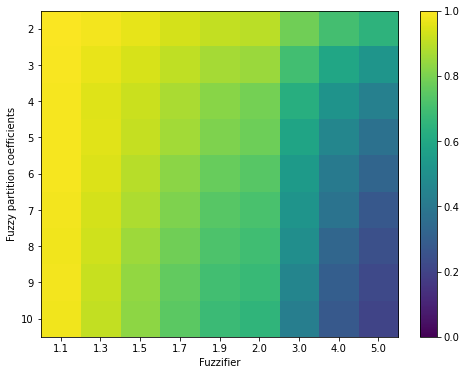

In [6]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1, 1, 1, ylabel='Fuzzy partition coefficients', xlabel='Fuzzifier')
ax.set_xticks(ms_index)
ax.set_xticklabels(map(str,ms))
ax.set_yticks(np.array([i for i in range(0, max_nk-1)]))
ax.set_yticklabels(np.array([i+2 for i in range(0, max_nk-1)],dtype=object)) 
plt.imshow(fpcs, vmin = 0, vmax = 1, aspect='auto')
plt.colorbar()
plt.show()

- Plotting: 1Ds

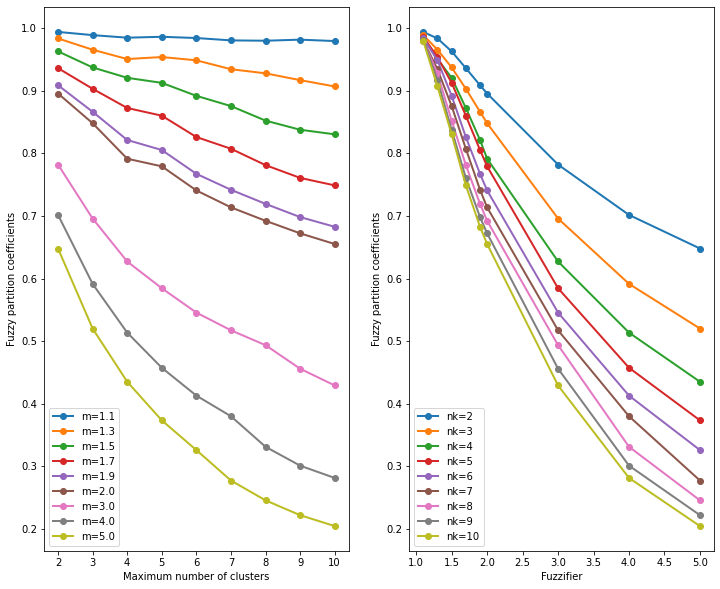

In [7]:
fig = plt.figure(figsize=(12, 10))

ax1 = fig.add_subplot(1, 2, 1, ylabel='Fuzzy partition coefficients', xlabel='Maximum number of clusters')
ax2 = fig.add_subplot(1, 2, 2, ylabel='Fuzzy partition coefficients', xlabel='Fuzzifier')

for i in range(mn):
    curfpc = fpcs[:, i]
    xcurfpc = np.array([i+2 for i in range(0, max_nk-1)])
    ax1.plot(xcurfpc, curfpc, marker="o",linewidth=2, label="m="+str(ms[i]))
    
for i in range(mn):
    curfpc = fpcs[i]
    xcurfpc = ms
    ax2.plot(xcurfpc, curfpc, marker="o",linewidth=2, label="nk="+str(i+2))

ax1.legend(bbox_to_anchor=(0.0, 0.0), loc='lower left')
ax2.legend(bbox_to_anchor=(0.0, 0.0), loc='lower left')
plt.show()

## (3-2-ii) Output

- Save Directory

In [8]:
# default is to create "out" folder in the current directory, if not exist
import os
savedir = './out/'
if os.path.isdir(savedir) == False:
    os.mkdir(savedir)

- FPC (2D)

In [9]:
# Save fuzzy-c-means coefficient
np.savetxt(savedir+'fcm_fpc2D.txt', fpcs, delimiter='\t')

- FPC (1Ds)

In [10]:
for i in range(mn):
    curfpc = fpcs[:, i]
    xcurfpc = np.array([i+2 for i in range(0, max_nk-1)])
    np.savetxt(savedir+'fcm_fpc1D_nk-dep_m'+str(ms[i])+'.txt', curfpc, delimiter='\r\n')
    np.savetxt(savedir+'fcm_xfpc1D_nk-dep_m'+str(ms[i])+'.txt', xcurfpc, delimiter='\r\n')
    
for i in range(mn):
    curfpc = fpcs[i]
    xcurfpc = ms
    np.savetxt(savedir+'fcm_fpc1D_m-dep_nk'+str(i+2)+'.txt', curfpc, delimiter='\r\n')
    np.savetxt(savedir+'fcm_xfpc1D_m-dep_nk'+str(i+2)+'.txt', xcurfpc, delimiter='\r\n')